<a href="https://colab.research.google.com/github/shiful133/r-python/blob/main/R_Titanic_Data_ggplot2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython


Found existing installation: rpy2 3.4.2
Uninstalling rpy2-3.4.2:
  Successfully uninstalled rpy2-3.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=314922 sha256=8c84e576c5feaebbc595713fd1898d3339970eeee42c2323e02203ecff94514a
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%R
#assign(".lib.loc", "drive/MyDrive/R/R_Packages/", envir = environment(.libPaths))
assign(".lib.loc", c("drive/MyDrive/R/R_Packages/","/usr/lib/R/site-library","/usr/lib/R/library"), envir = environment(.libPaths))
#assign(".lib.loc", c("drive/MyDrive/R/R_Packages/","/usr/local/lib/R/site-library","/usr/lib/R/site-library","/usr/lib/R/library"), envir = environment(.libPaths))

.libPaths()

[1] "drive/MyDrive/R/R_Packages/" "/usr/lib/R/site-library"    
[3] "/usr/lib/R/library"         


In [ ]:
%%R
library(ggplot2)
library(tidyverse)
titanic <- read.csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
head(titanic)

  PassengerId Survived Pclass
1           1        0      3
2           2        1      1
3           3        1      3
4           4        1      1
5           5        0      3
6           6        0      3
                                                 Name    Sex Age SibSp Parch
1                             Braund, Mr. Owen Harris   male  22     1     0
2 Cumings, Mrs. John Bradley (Florence Briggs Thayer) female  38     1     0
3                              Heikkinen, Miss. Laina female  26     0     0
4        Futrelle, Mrs. Jacques Heath (Lily May Peel) female  35     1     0
5                            Allen, Mr. William Henry   male  35     0     0
6                                    Moran, Mr. James   male  NA     0     0
            Ticket    Fare Cabin Embarked
1        A/5 21171  7.2500              S
2         PC 17599 71.2833   C85        C
3 STON/O2. 3101282  7.9250              S
4           113803 53.1000  C123        S
5           373450  8.0500              S

In [ ]:
%%R
#setup factors
titanic$Pclass <- as.factor(titanic$Pclass)
titanic$Survived <- as.factor(titanic$Survived)
titanic$Sex <- as.factor(titanic$Sex)
titanic$Embarked <- as.factor(titanic$Embarked)


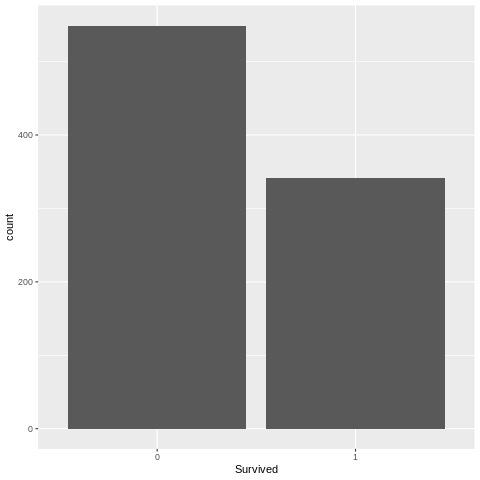

In [ ]:
%%R
ggplot(titanic, aes(x = Survived))+
geom_bar()


In [ ]:
%%R
ggplot(titanic, aes(x = Survived))+
geom_bar()

prop.table(table(titanic$Survived))


        0         1 
0.6161616 0.3838384 


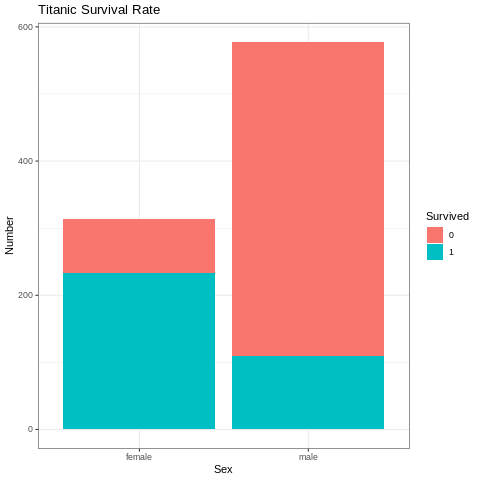

In [ ]:
%%R
ggplot(titanic, aes(x = Sex, fill=Survived))+
  geom_bar()+
  theme_bw()+
  labs(y="Number",
       title="Titanic Survival Rate",
       )


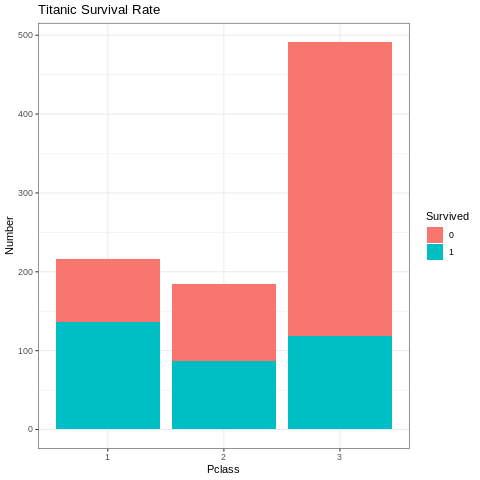

In [ ]:
%%R
ggplot(titanic, aes(x = Pclass, fill=Survived))+
  geom_bar()+
  theme_bw()+
  labs(y="Number",
       title="Titanic Survival Rate",
       )


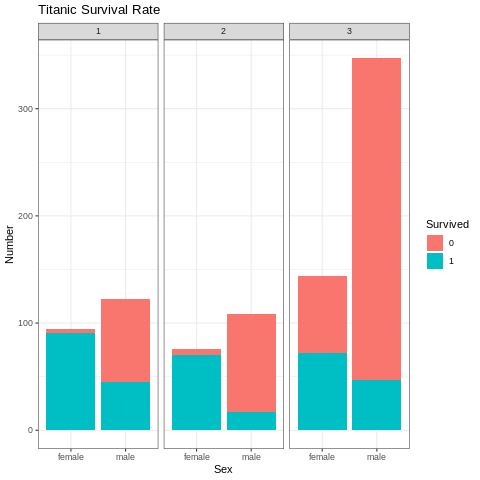

In [ ]:
%%R
ggplot(titanic, aes(x = Sex, fill=Survived))+
  geom_bar()+
  theme_bw()+
  facet_wrap(~ Pclass)+
  labs(y="Number",
       title="Titanic Survival Rate",
       )

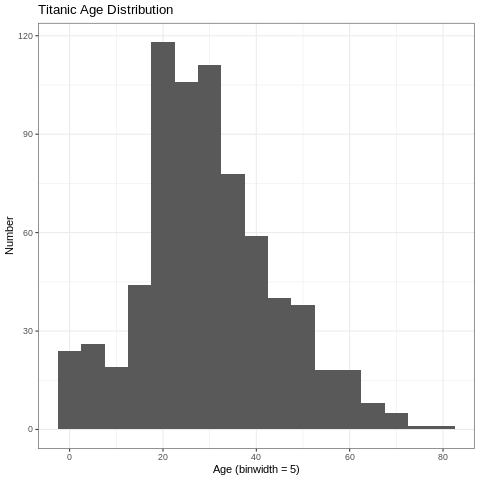

In [ ]:
%%R
ggplot(titanic, aes(x = Age))+
  geom_histogram(binwidth=5)+
  theme_bw()+
  labs(y="Number",
       x = "Age (binwidth = 5)",
       title="Titanic Age Distribution",
       )

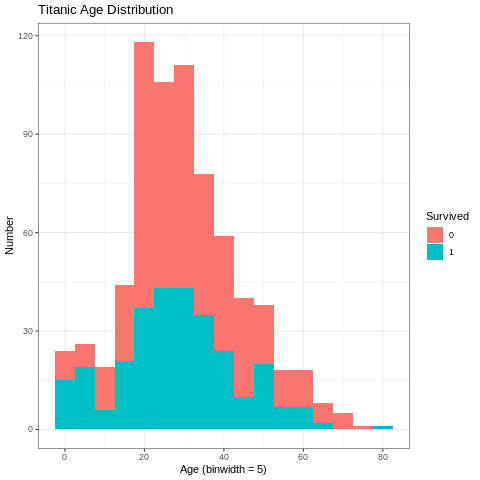

In [ ]:
%%R
ggplot(titanic, aes(x = Age, fill=Survived))+
  geom_histogram(binwidth=5)+
  theme_bw()+
  labs(y="Number",
       x = "Age (binwidth = 5)",
       title="Titanic Age Distribution",
       )

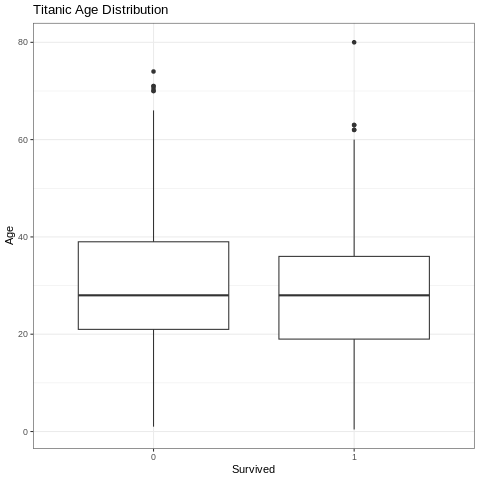

In [ ]:
%%R
ggplot(titanic, aes(x = Survived, y=Age))+
  geom_boxplot()+
  theme_bw()+
  labs(y="Age",
       x = "Survived",
       title="Titanic Age Distribution",
       )

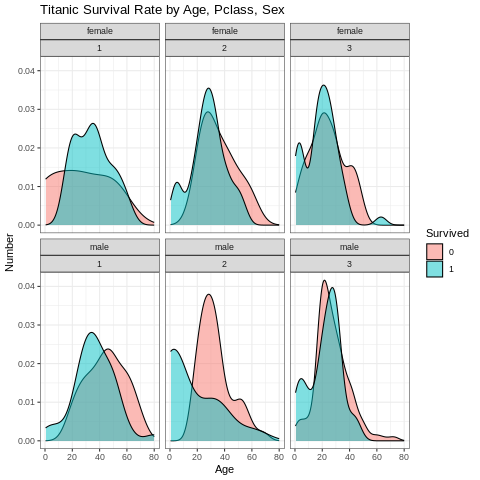

In [ ]:
%%R
ggplot(titanic, aes(x = Age, fill=Survived))+
  geom_density(alpha=.5)+
  theme_bw()+
  facet_wrap(Sex~Pclass)+
  labs(y="Number",
       x = "Age",
       title="Titanic Survival Rate by Age, Pclass, Sex"
       )

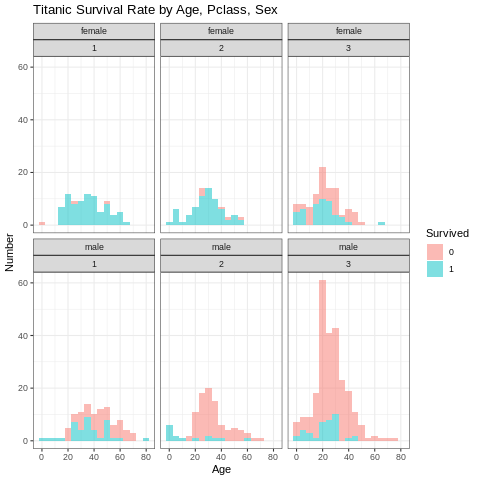

In [ ]:
%%R
ggplot(titanic, aes(x = Age, fill=Survived))+
  geom_histogram(alpha=.5,binwidth=5)+
  theme_bw()+
  facet_wrap(Sex~Pclass)+
  labs(y="Number",
       x = "Age",
       title="Titanic Survival Rate by Age, Pclass, Sex"
       )

In [ ]:
%%R
#install.packages("rgee", lib='drive/MyDrive/R/R_Packages/')
library(rgee)
library(sf)
library(raster)